In [17]:
# M551 Spring 2017 HW1
# Anubhab Haldar
# 14th Feb 2017.


# Relevant imports

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Larger figures
plt.rcParams['figure.figsize'] = 10, 7

# Question 4:

Here, we find the behaviour of the 2nd order centered difference formula, specifically, we verify the order of the scheme.

In [18]:
# Defining the finite-difference derivative function.
def fd2(func, x0, h):
    # Computing and returning derivative.
    return (func(x0+h)-func(x0-h))/(2*h)

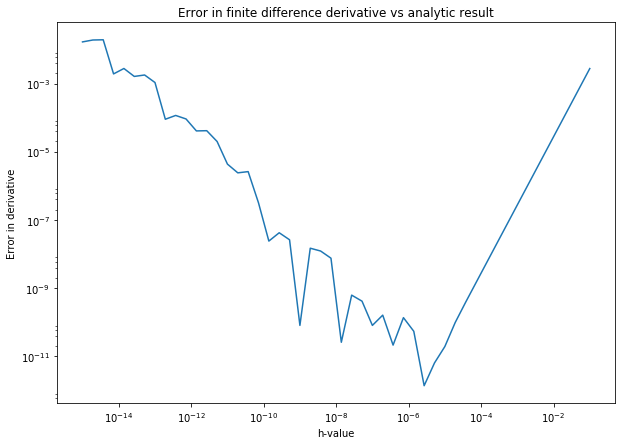

In [19]:
h = np.logspace(-1, -15, 50)
x0 = 0.5
# Since the derivative of e^x is e^x, we define 
# the following expression as the error
error = np.abs(fd2(np.exp, x0, h)-np.exp(x0))

# The plot and supporting statements.
plt.loglog(h, error)
plt.title('Error in finite difference derivative vs analytic result')
plt.xlabel('h-value')
plt.ylabel('Error in derivative')

Value of slope is 2.0162189234
Approximation worsens from h = 2.68269579528e-06


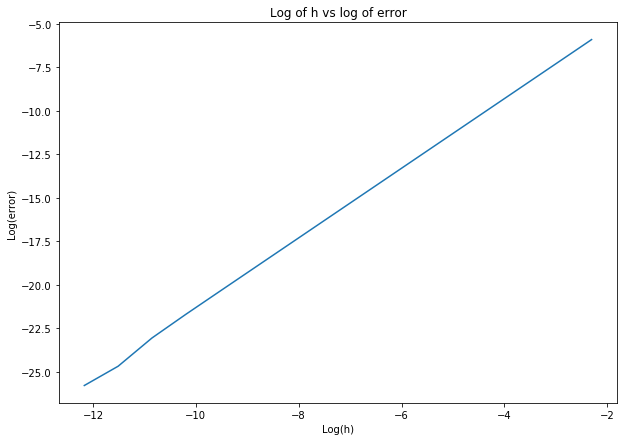

In [20]:
# Formally calculating order.

# Beyond this point is where the error is well-behaved.
# For h lower than this, the error is roundoff-dominated and random.
point_of_lowest_error = np.argmin(error)

# Since h gets smaller from left to right, we consider
# left of the minimum error.
logerror = np.log(error[:point_of_lowest_error])
logh = np.log(h[:point_of_lowest_error])
plt.plot(logh, logerror)
plt.title('Log of h vs log of error')
# Fitting a line (1-degree polynomial) to the data.
plt.xlabel('Log(h)')
plt.ylabel('Log(error)')
# The fit returns and array of coefficients in descending order of
# power of x.
coefs = np.polyfit(logh, logerror, deg=1)
print("Value of slope is", coefs[0])
print("Approximation worsens from h =",h[point_of_lowest_error])

# Question 5

We study the behaviour of the recursion formula

$$y_n = \frac{1}{n} - \alpha y_{n-1}$$

In [21]:
# Index of y values
indexarray = np.linspace(0, 19, 20)

# Alpha value
a = 10

# Array to store y values.
y = np.zeros(20)
y[0] = np.log((1+a)/a)
print(y[0])

for n in range(1, 20):
    y[n] = 1/n-a*y[n-1]

0.0953101798043


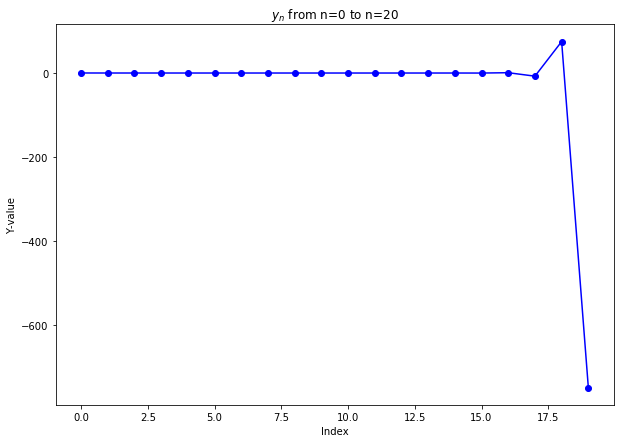

In [22]:
plt.plot(y, 'bo-')
plt.title('$y_n$ from n=0 to n=20')
plt.xlabel('Index')
plt.ylabel('Y-value')
plt.show()

## This is seen better in a semilogy plot.

Since y is always positive, analytically, we can use the absolute value
to look for divergence on a semilogy plot.

The divergance is clearly seen in the semilogy plot.

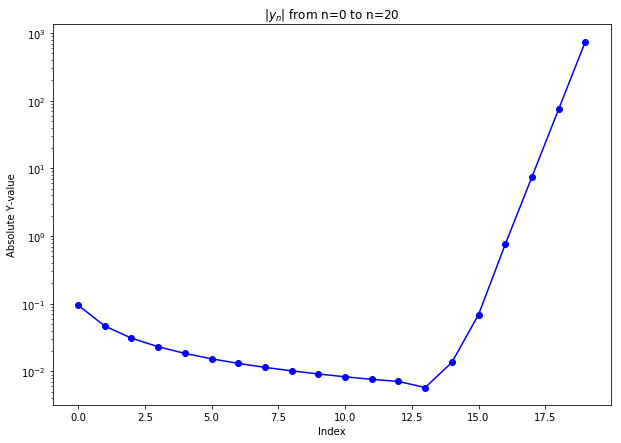

In [23]:
plt.semilogy(np.abs(y), 'bo-')
plt.title('$|y_n|$ from n=0 to n=20')
plt.xlabel('Index')
plt.ylabel('Absolute Y-value')
plt.show()

## END 